In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
from sklearn import preprocessing
import seaborn as sb
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("futbol.csv", parse_dates= True, index_col= 1)

In [3]:
dataset = np.array(df.filter(["Nationality","Club","Overall","Potential","Value","Wage"]).values)

In [4]:
unique, counts = np.unique(dataset[:,0], return_counts=True)

In [5]:
newDataset = dataset

In [6]:
for i in range(np.where(counts<dataset.shape[0]/unique.shape[0])[0].shape[0]):
    newDataset=np.delete(newDataset,np.where(newDataset == np.delete(unique,np.where(counts>dataset.shape[0]/unique.shape[0]))[i])[0],axis=0)

In [7]:
unique, counts = np.unique(newDataset[:,0], return_counts=True)

In [8]:
promedios = [sum([dataset[j][2] for j in np.where(dataset == unique[i])[0]])/np.where(dataset == unique[i])[0].shape[0] for i in range(len(unique))]

In [9]:
dic = {x[0]:x[1] for x in zip(unique,promedios)}
teams_sort = dict(sorted(dic.items(), key=operator.itemgetter(1), reverse=True))

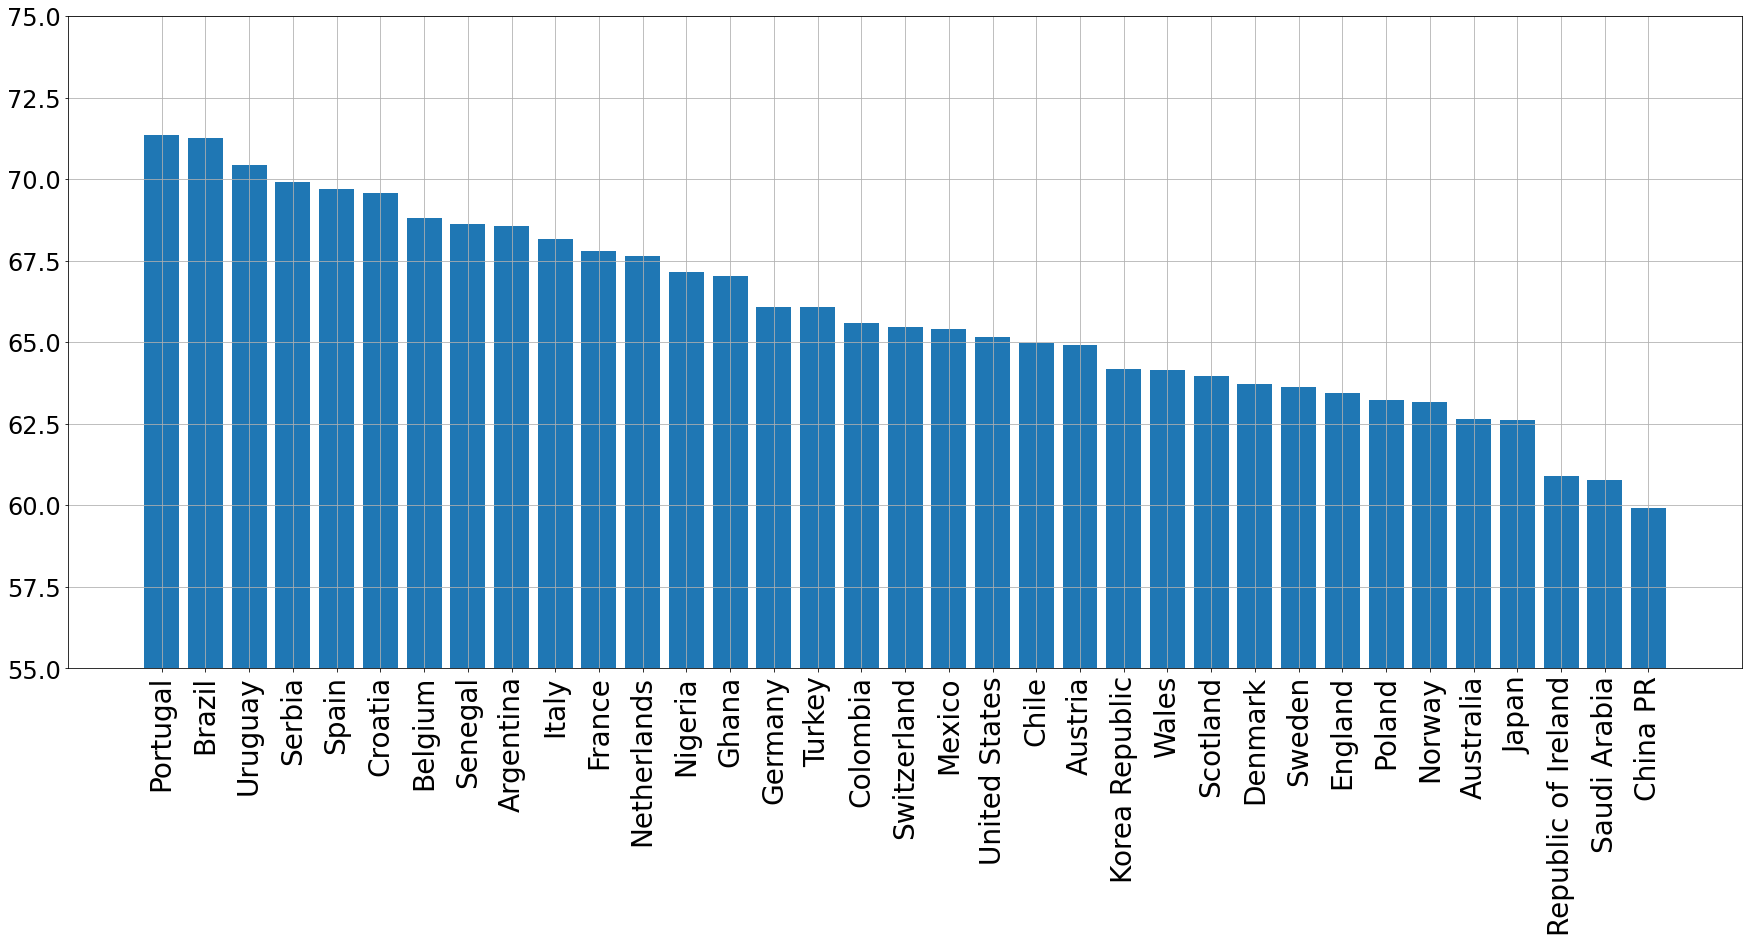

In [10]:
plt.figure(figsize=(30,12))
plt.bar(teams_sort.keys(),teams_sort.values())
plt.ylim(55,75)
plt.yticks(fontsize=24)
plt.xticks(list(teams_sort.keys()), rotation='vertical', fontsize=28)
plt.grid()
plt.show()

In [11]:
borrar = "€K"
for i in range(0,2,1):
    for j in range(len(newDataset[:,4+i])):
        for k in range(len(borrar)):
            newDataset[:,4+i][j] = newDataset[:,4+i][j].replace(borrar[k],"")
for i in range(0,2,1):
    for j in range(len(newDataset[:,4+i])):
        if newDataset[:,4+i][j][-1] == "M":
            newDataset[:,4+i][j] = float(newDataset[:,4+i][j].replace("M",""))*1000

In [12]:
for n in range(2):
    newDataset[:,4+n] = [float(num) for num in newDataset[:,4+n]]
for n in range(4):
    newDataset[:,2+n] = (newDataset[:,2+n] - min(newDataset[:,2+n]))/(max(newDataset[:,2+n])-min(newDataset[:,2+n]))

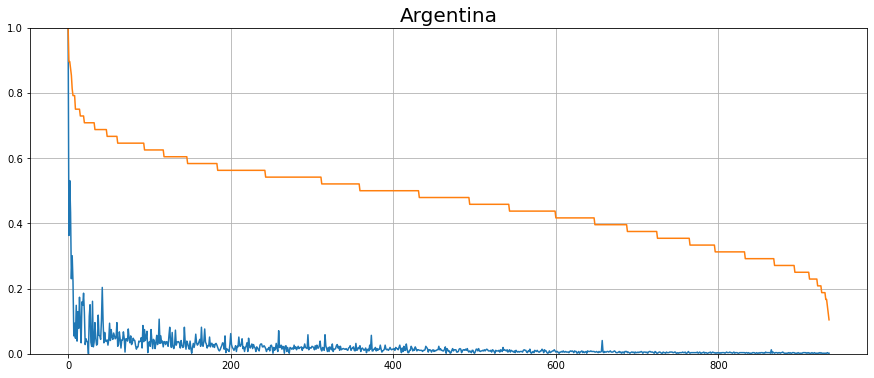

0.5303187060027524


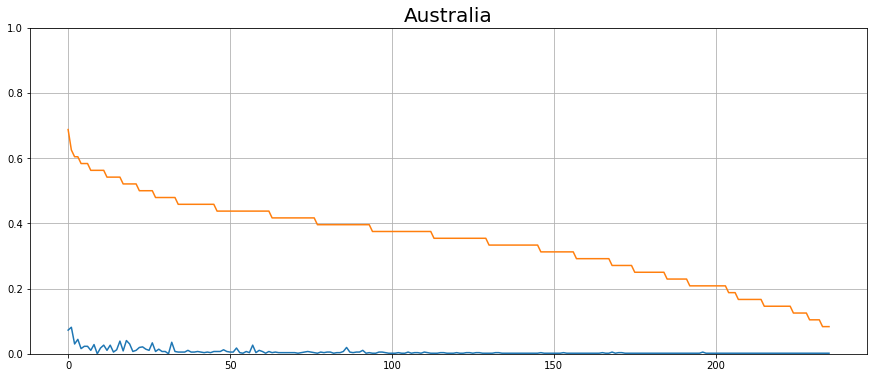

0.5829166064052672


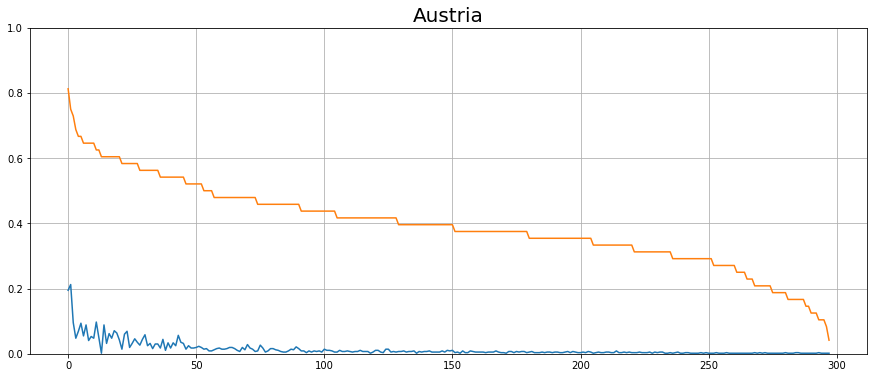

0.6897657101300977


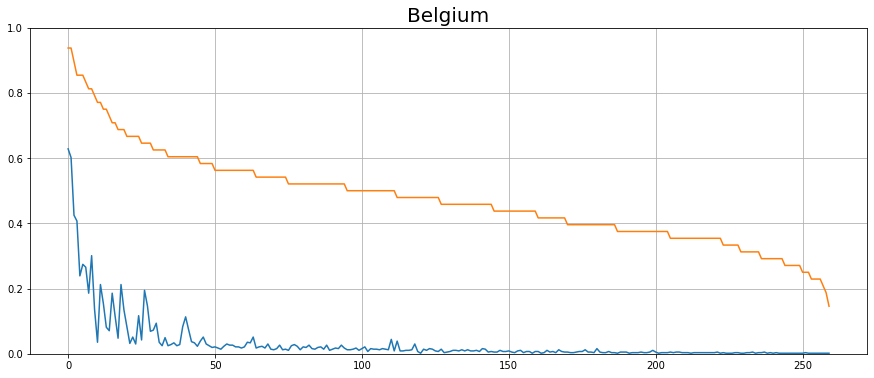

0.708322768405104


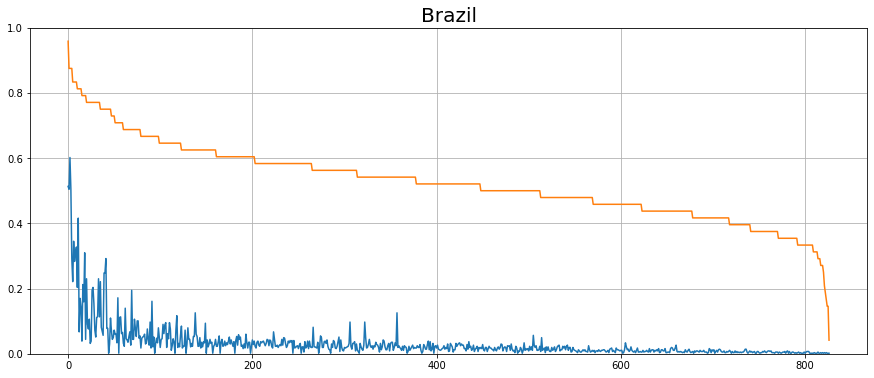

0.6345115593650524


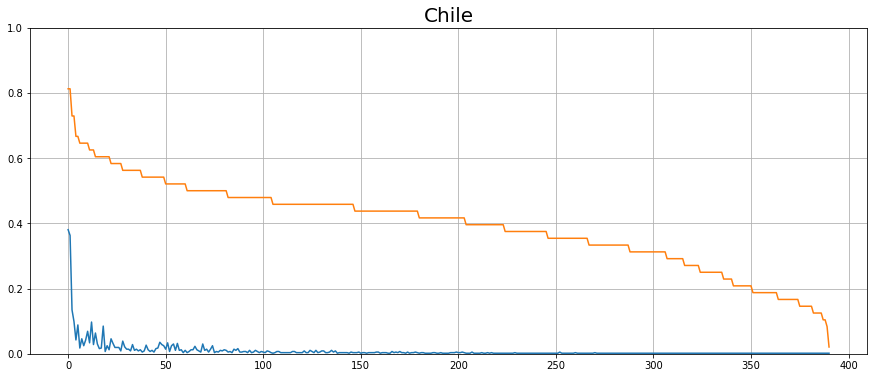

0.461212537227908


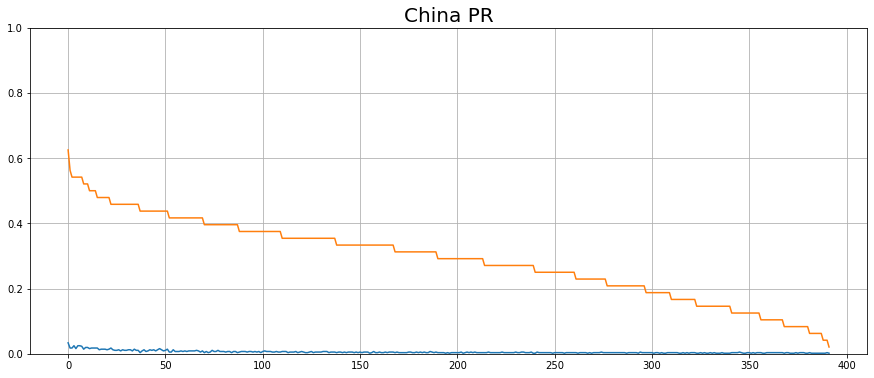

0.7611703175736328


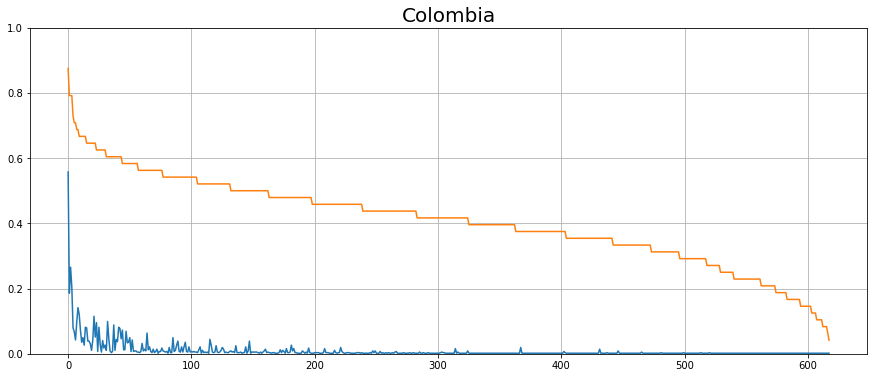

0.46034025005398804


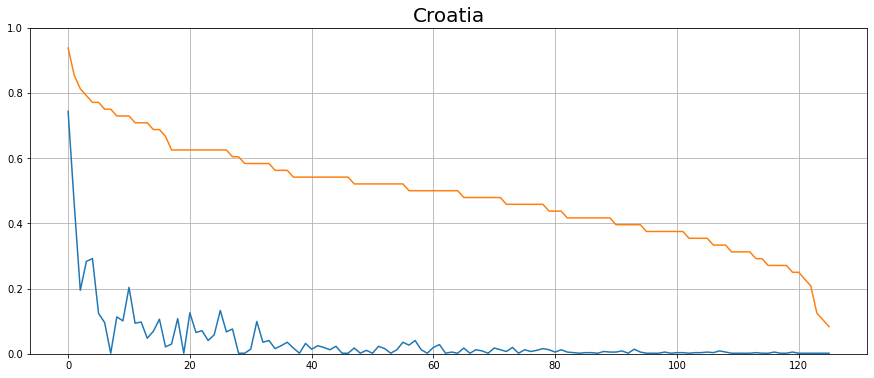

0.6271297388944496


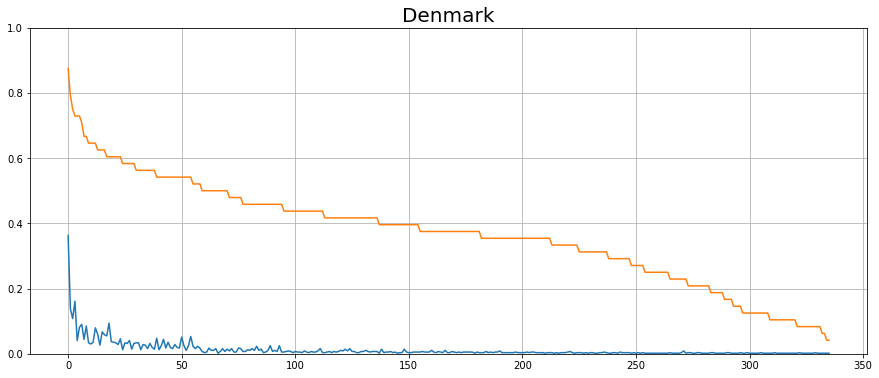

0.5797896601329176


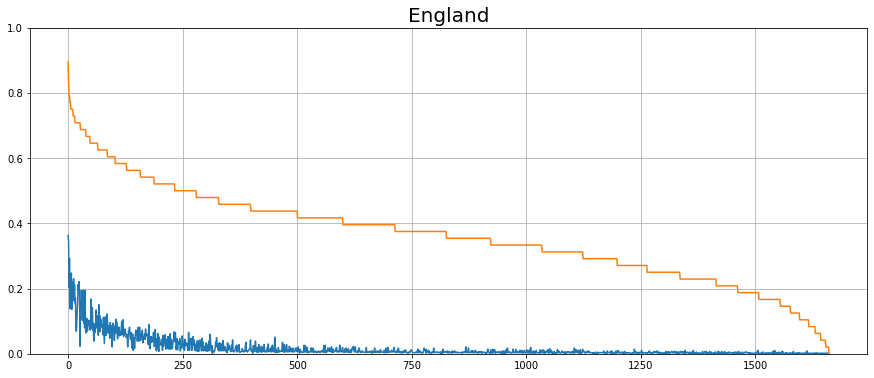

0.6954596629515967


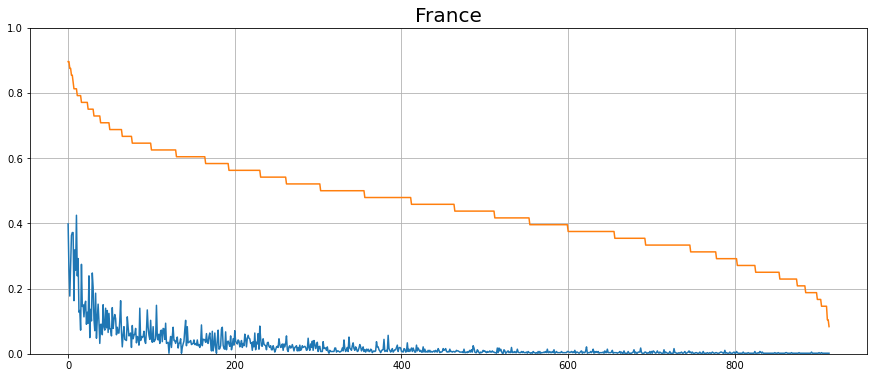

0.6891521621566591


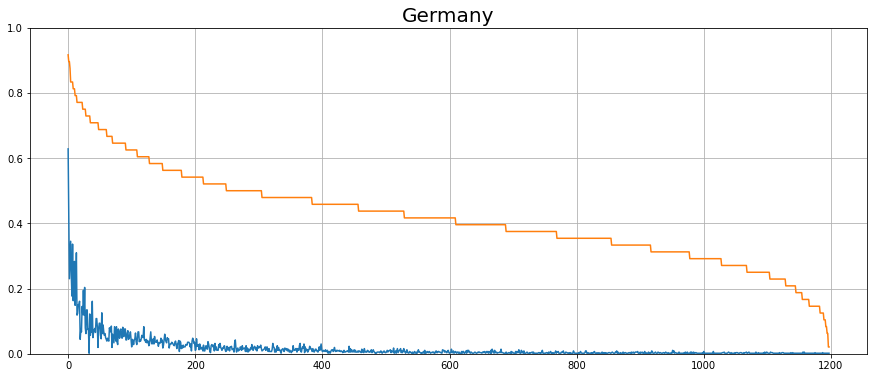

0.6563001212379234


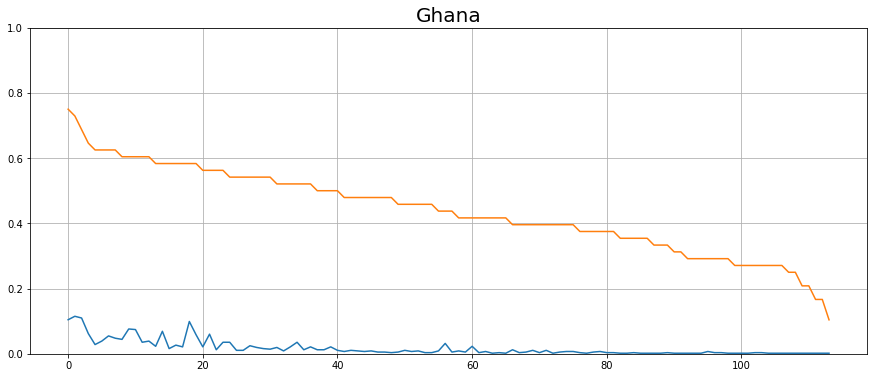

0.7294366059145876


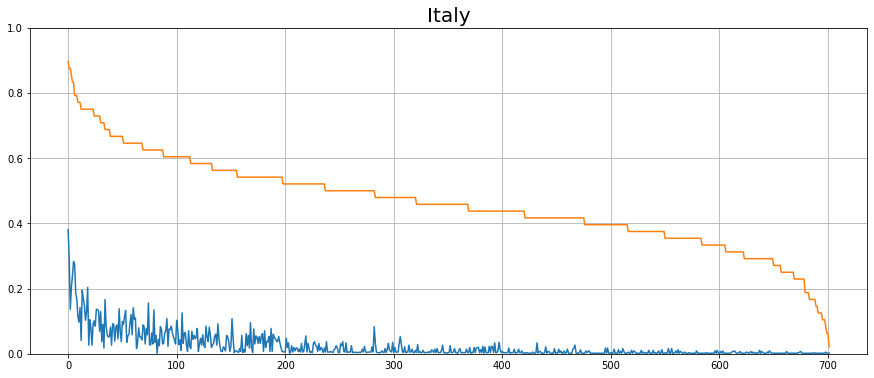

0.694462505597786


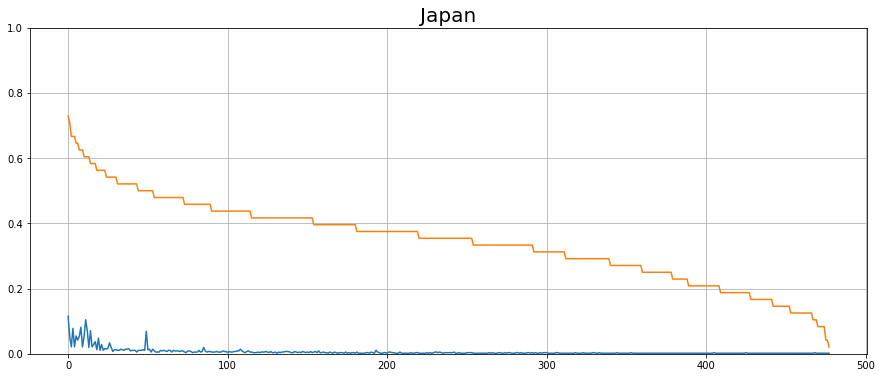

0.5703689389254565


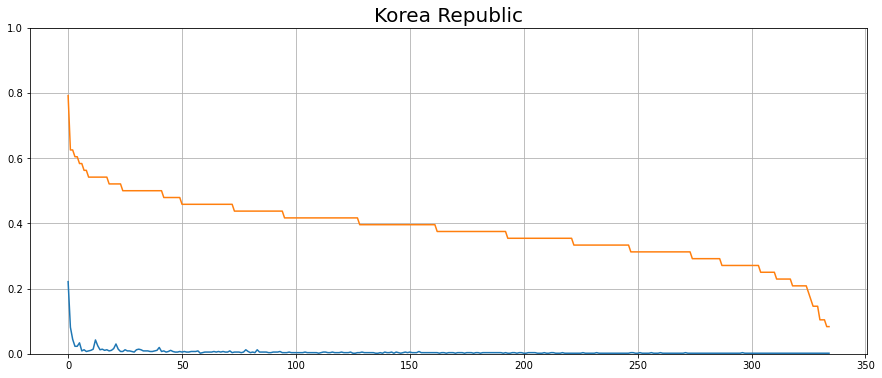

0.4792749355120629


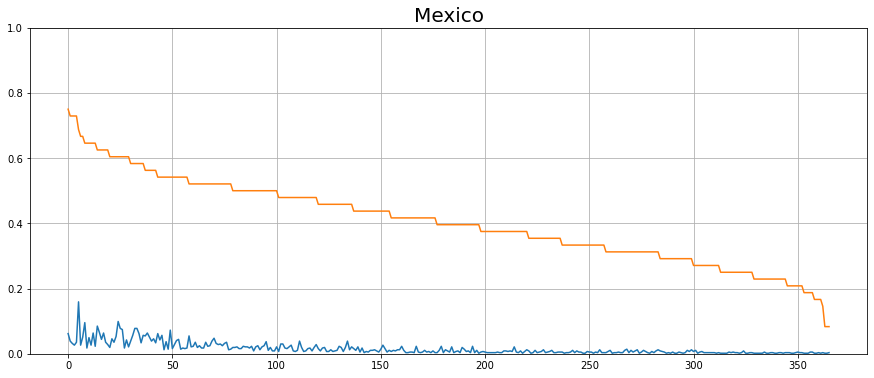

0.7103457904442783


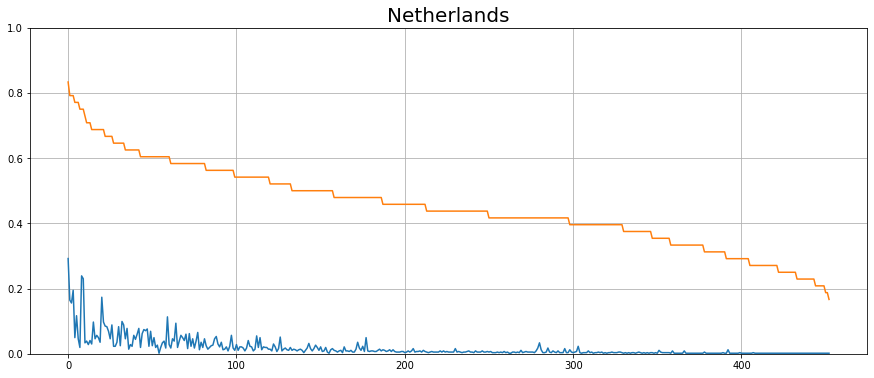

0.6675576439409004


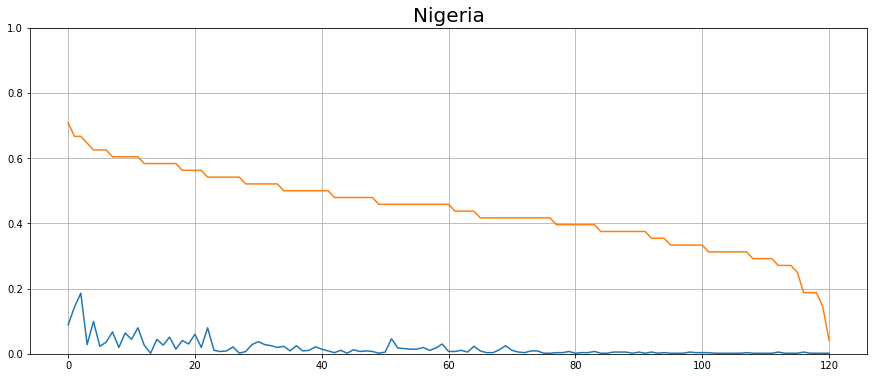

0.6182940066422786


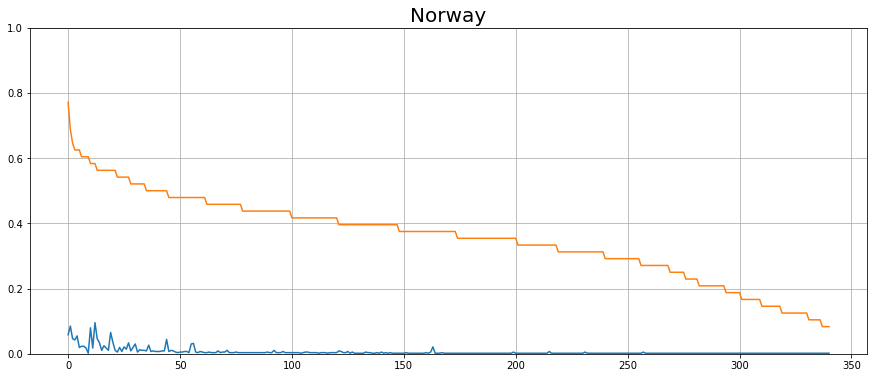

0.5427133153250983


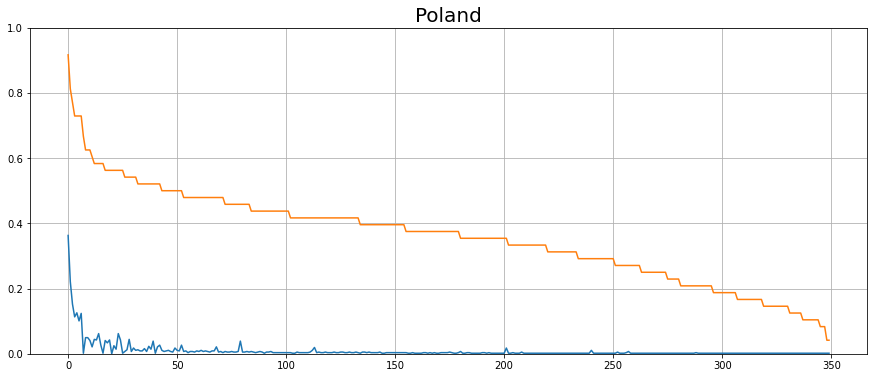

0.5452539418059722


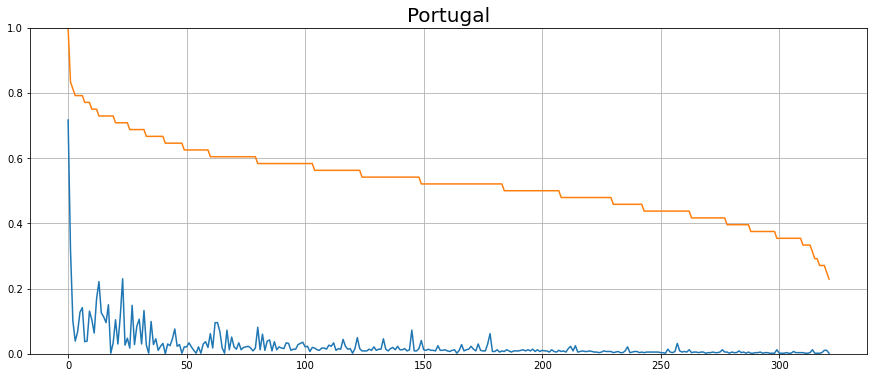

0.5835699476690482


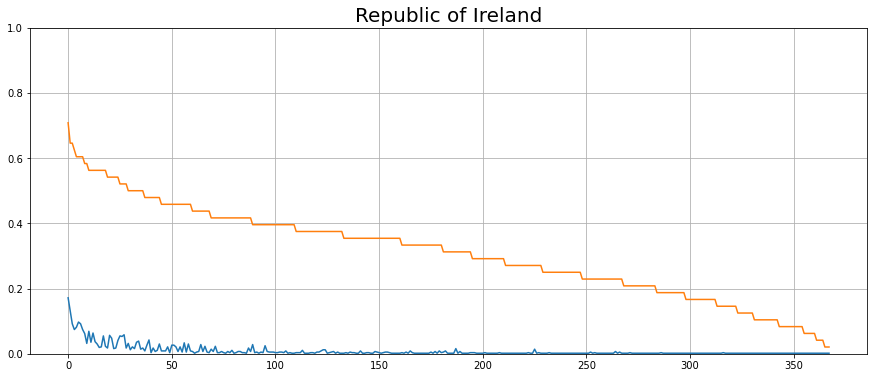

0.613203302275378


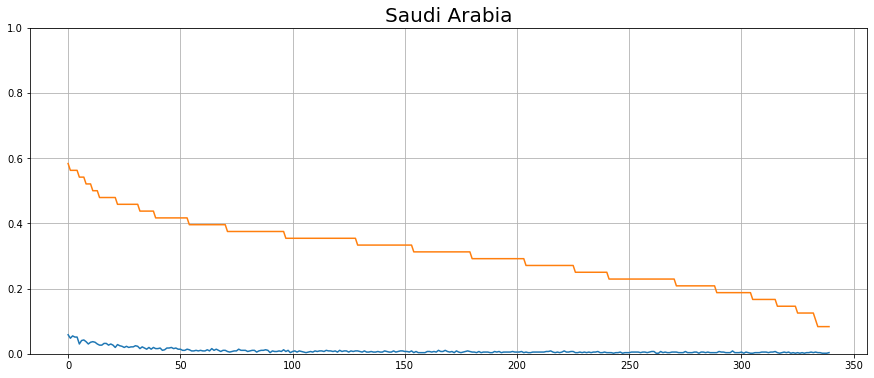

0.772866364494572


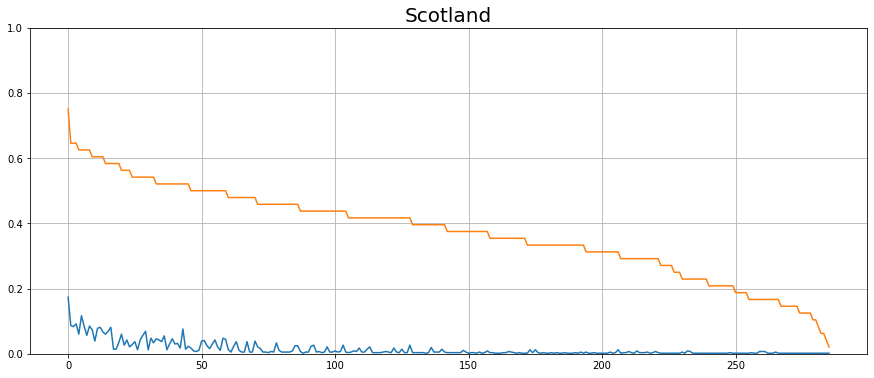

0.6739078465609727


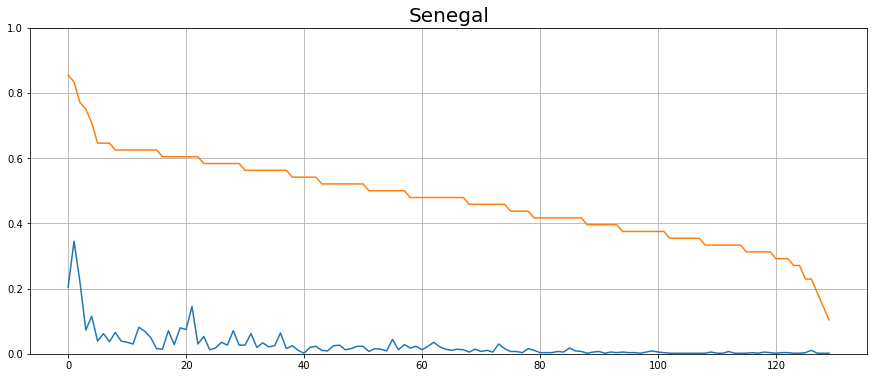

0.6768391127576251


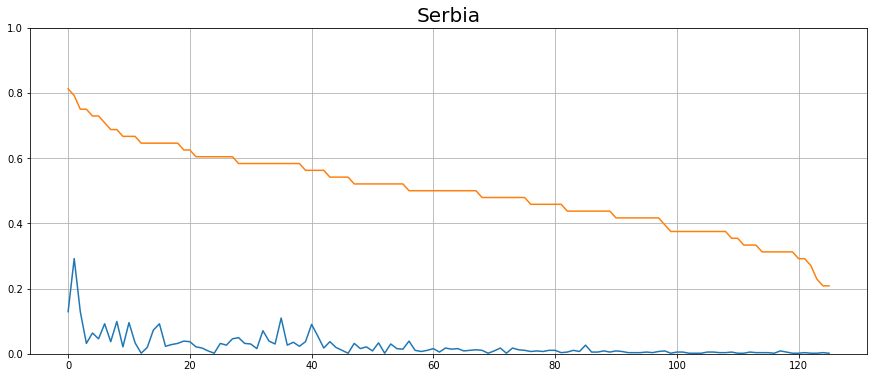

0.6392947509848532


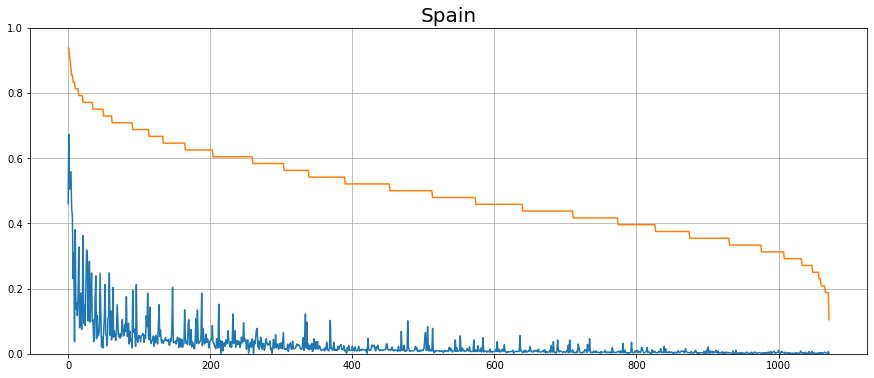

0.6228813739235375


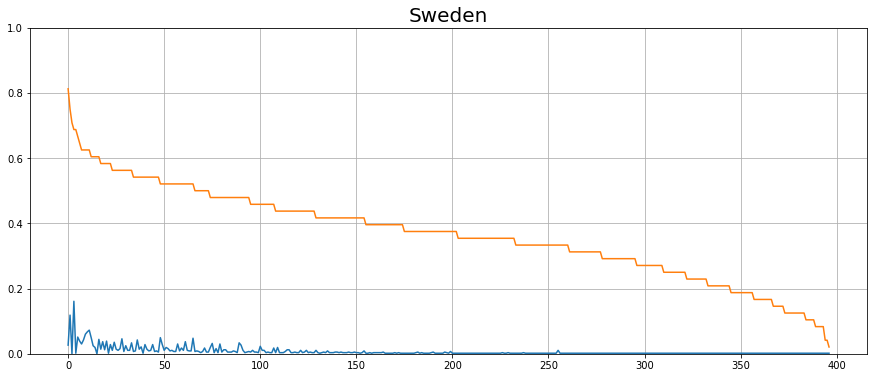

0.545360400510205


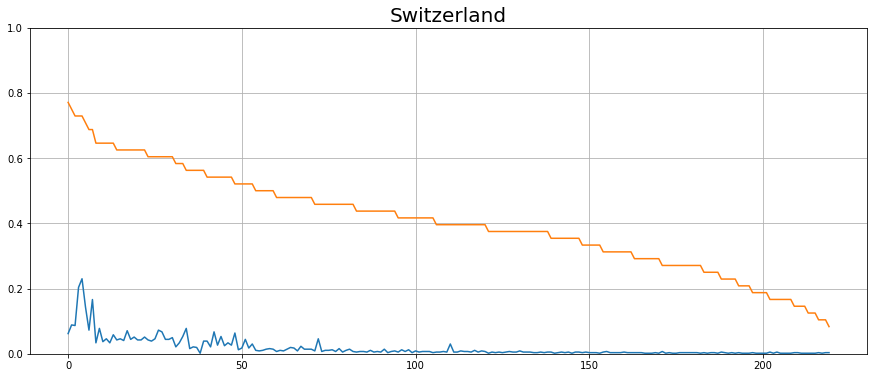

0.6778599680469395


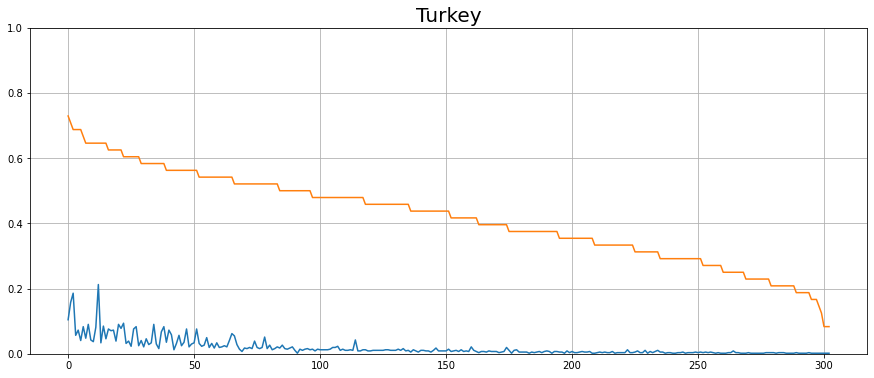

0.6798738140280264


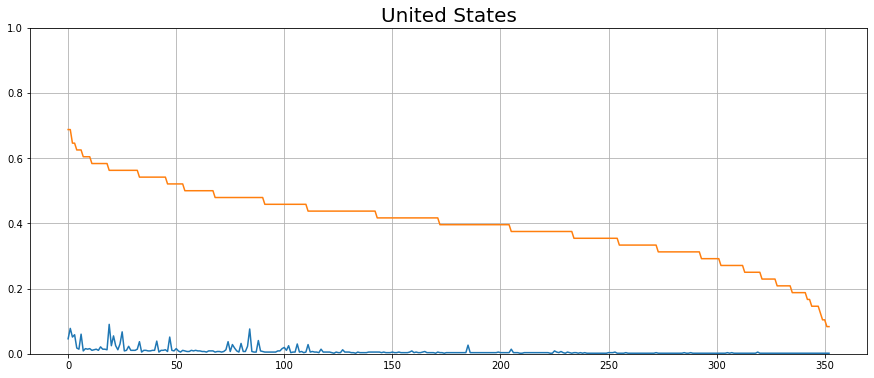

0.543017470302365


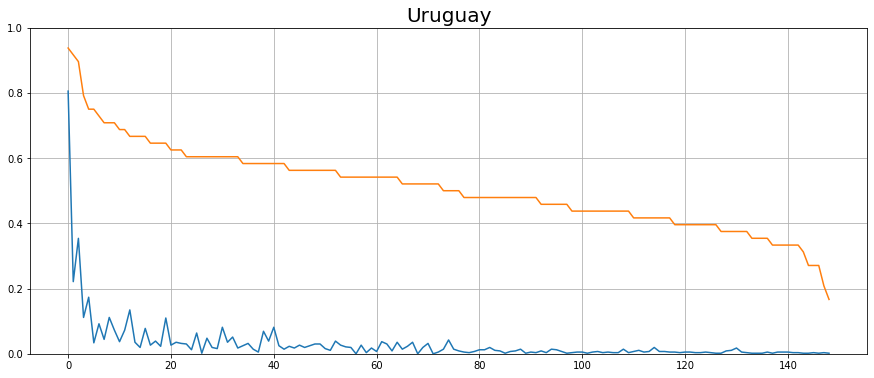

0.5961411360254818


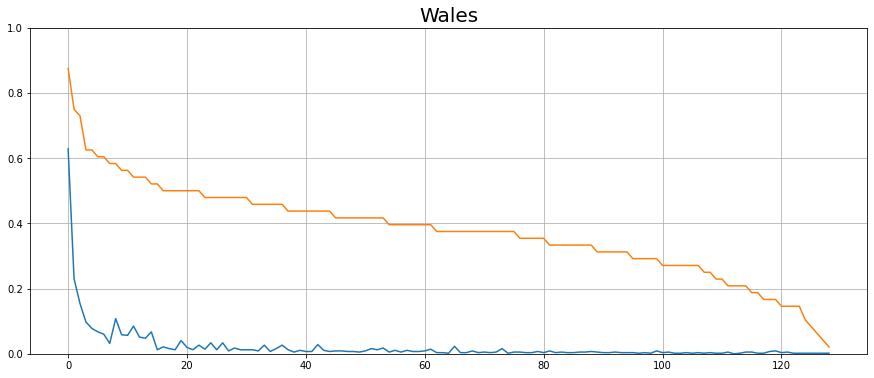

0.5779135595638892


In [13]:
for pais in unique:
    plt.figure(figsize=(15,6))
    plt.plot(newDataset[np.where(newDataset == pais)[0]][:,5])
    plt.plot(newDataset[np.where(newDataset == pais)[0]][:,2])
    plt.grid()
    plt.ylim(0,1)
    plt.title(pais, fontsize=20)
    plt.show()
    print(np.corrcoef(list(newDataset[np.where(newDataset == pais)[0]][:,5]),list(newDataset[np.where(newDataset == pais)[0]][:,2]))[0][1])

In [14]:
newDf = pd.DataFrame(data=newDataset,columns=["Pais","Club","Overall","Potential","Value","Salario"])
newDf

,Pais,Club,Overall,Potential,Value,Salario
0,Argentina,FC Barcelona,1.0,0.978723,0.932489,1.0
1,Portugal,Juventus,1.0,0.978723,0.649789,0.716814
2,Brazil,Paris Saint-Germain,0.958333,0.957447,1.0,0.513274
3,Spain,Manchester United,0.9375,0.957447,0.607595,0.460177
4,Belgium,Manchester City,0.9375,0.93617,0.860759,0.628319
...,...,...,...,...,...,...
15645,England,Crewe Alexandra,0.020833,0.361702,0.000506,0.00177
15646,Sweden,Trelleborgs FF,0.020833,0.319149,0.000506,0.00177
15647,England,Cambridge United,0.020833,0.404255,0.000506,0.00177
15648,England,Tranmere Rovers,0.020833,0.382979,0.000506,0.00177


C:\Users\cowar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


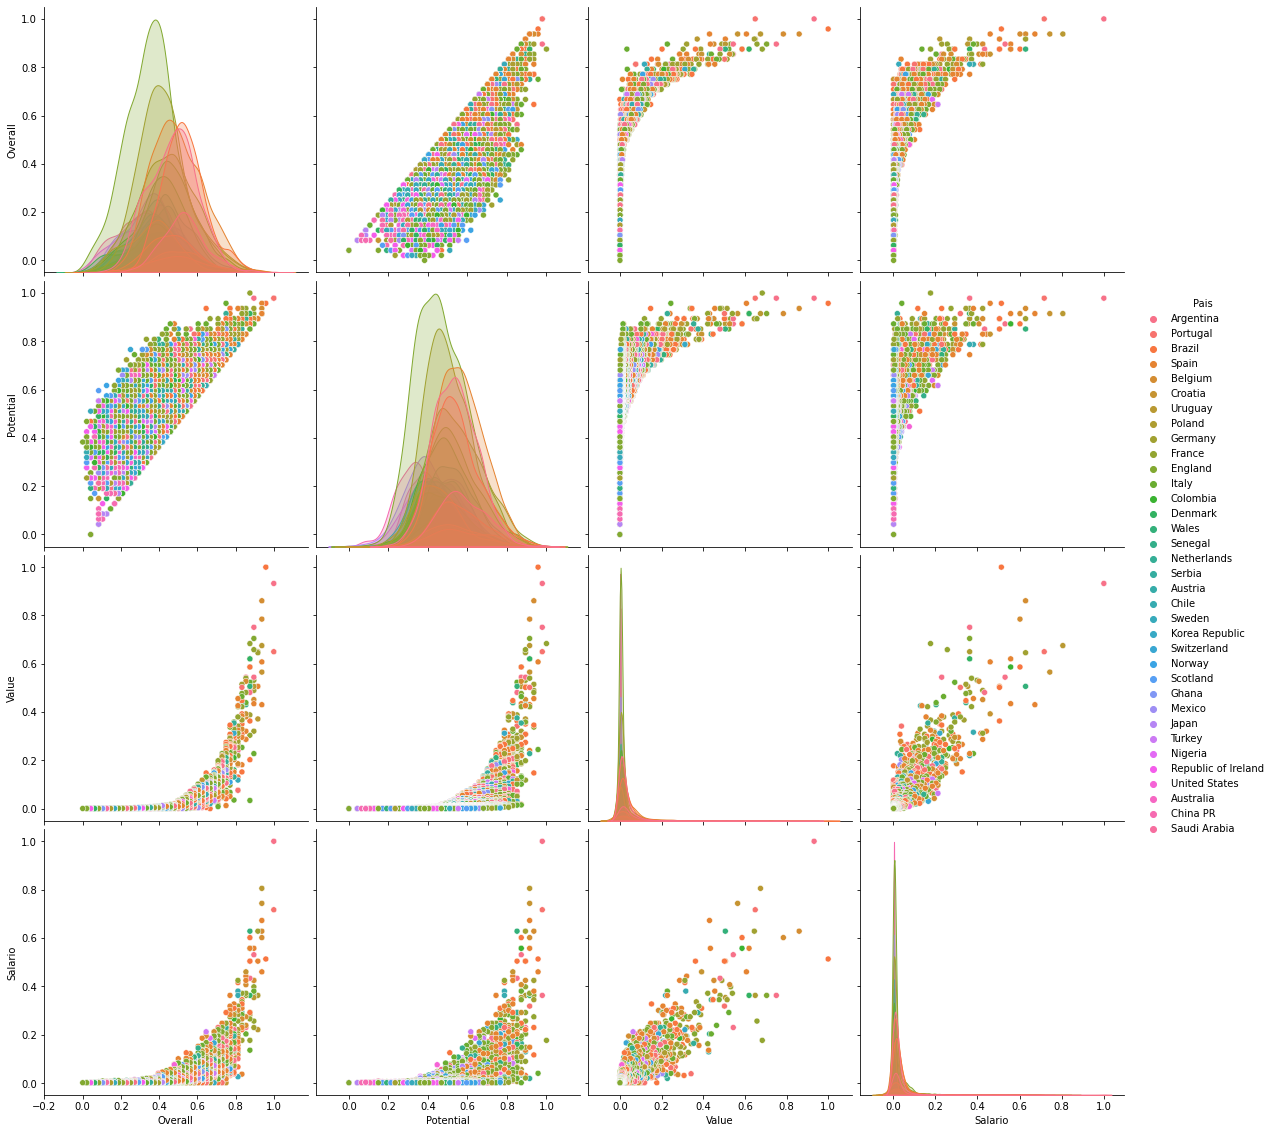

In [15]:
sb.pairplot(newDf.dropna(), hue='Pais',size=4,vars=["Overall","Potential","Value","Salario"])

C:\Users\cowar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


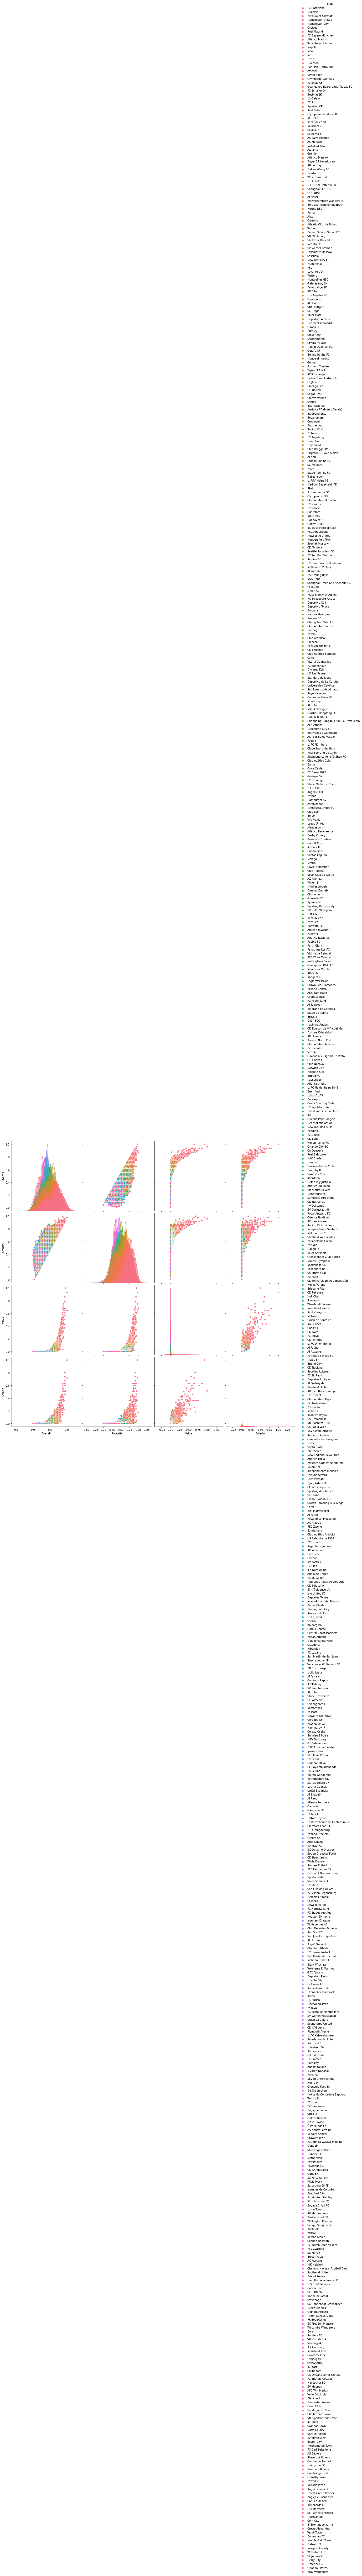

In [16]:
sb.pairplot(newDf.dropna(), hue='Club',size=4,vars=["Overall","Potential","Value","Salario"])

In [17]:
newDf["Pais"] = newDf.Pais.astype("category").cat.codes
newDf["Club"] = newDf.Club.astype("category").cat.codes
newDf["Pais"] = (newDf["Pais"] - min(newDf["Pais"]))/ (max(newDf["Pais"])-min(newDf["Pais"]))
newDf["Club"] = (newDf["Club"] - min(newDf["Club"]))/ (max(newDf["Club"])-min(newDf["Club"]))

In [18]:
newDf

,Pais,Club,Overall,Potential,Value,Salario
0,0.000000,0.327189,1.0,0.978723,0.932489,1.0
1,0.647059,0.502304,1.0,0.978723,0.649789,0.716814
2,0.117647,0.669739,0.958333,0.957447,1.0,0.513274
3,0.823529,0.577573,0.9375,0.957447,0.607595,0.460177
4,0.088235,0.576037,0.9375,0.93617,0.860759,0.628319
...,...,...,...,...,...,...
15645,0.294118,0.254992,0.020833,0.361702,0.000506,0.00177
15646,0.852941,0.903226,0.020833,0.319149,0.000506,0.00177
15647,0.294118,0.188940,0.020833,0.404255,0.000506,0.00177
15648,0.294118,0.901690,0.020833,0.382979,0.000506,0.00177


In [19]:

mCorr=newDf.corr().round(2)
mCorr

,Pais,Club
Pais,1.0,0.0
Club,0.0,1.0


In [20]:
input_train, input_test, target_train, target_test = train_test_split(newDf.drop(["Pais","Club"],axis=1), newDf["Pais"], test_size = 0.3, random_state=4,shuffle=True)

model = Sequential()
model.add(layers.Conv2D())
model.add((100, activation = 'relu', return_sequences = True, input_shape = (step_days ,input_train.shape[2])))
model.add(LSTM(32, activation = 'relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(3))
model.compile(optimizer = 'adam', loss = 'mse')
history = model.fit(input_train, target_train, validation_data = (input_test, target_test),batch_size = 16, epochs = 100)